# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [196]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [197]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data, we used enumerate() to track the index of each city as well
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | humberto de campos
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | slave lake
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | valdivia
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | ulricehamn
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | sisimiut
Processing Record 21 of Set 1 | port alfred
Processing Rec

In [198]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [199]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,humberto de campos,-2.5983,-43.4611,24.26,89,15,1.44,BR,1719795821
1,thompson,55.7435,-97.8558,26.09,29,40,4.12,CA,1719795627
2,slave lake,55.2834,-114.7690,14.99,88,100,3.60,CA,1719795821
3,port-aux-francais,-49.3500,70.2167,4.81,97,100,6.71,TF,1719795821
4,ribeira grande,38.5167,-28.7000,20.99,85,0,8.05,PT,1719795821


In [200]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [201]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,humberto de campos,-2.5983,-43.4611,24.26,89,15,1.44,BR,1719795821
1,thompson,55.7435,-97.8558,26.09,29,40,4.12,CA,1719795627
2,slave lake,55.2834,-114.7690,14.99,88,100,3.60,CA,1719795821
3,port-aux-francais,-49.3500,70.2167,4.81,97,100,6.71,TF,1719795821
4,ribeira grande,38.5167,-28.7000,20.99,85,0,8.05,PT,1719795821


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

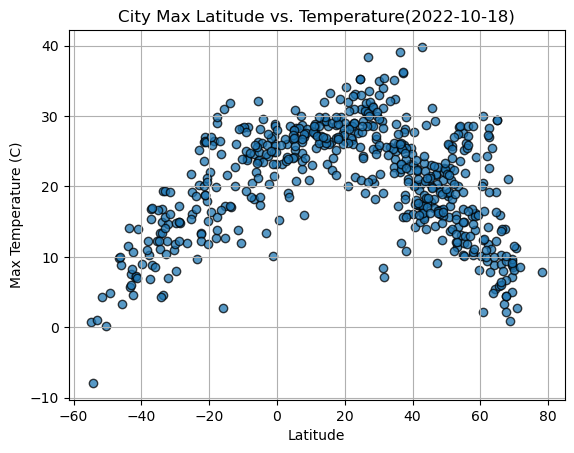

In [202]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y, edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

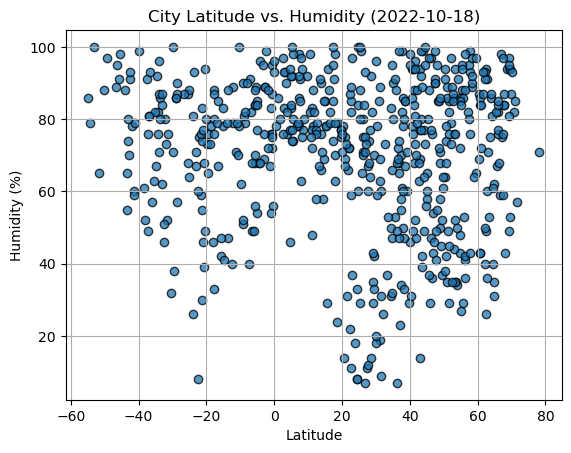

In [203]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x, y, alpha=0.75, edgecolors="black")
# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

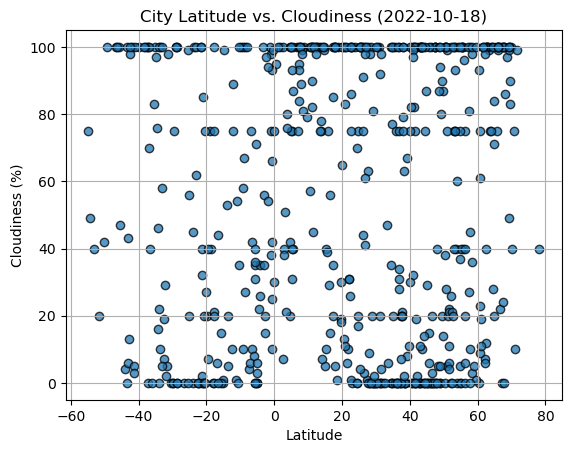

In [204]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]

plt.scatter(x,y, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

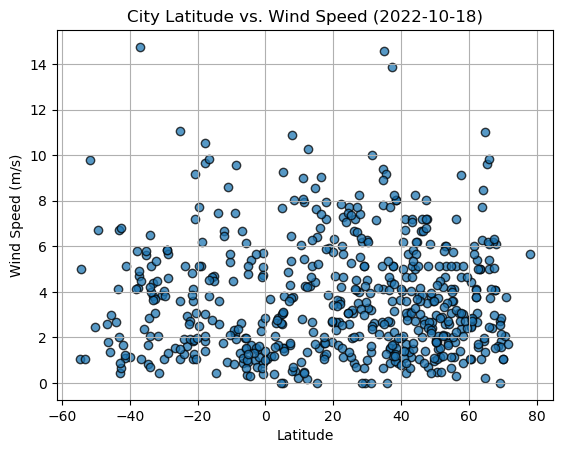

In [205]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [206]:
# Define a function to create Linear Regression plots
def plt_line_regression (df,x_col,y_col,a,b):

    #Compute Linear regression 
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])

    #create the regression line
    reg_line = slope * df[x_col] + intercept
    line_label = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))

    #print r_value
    print(f"The r-value is: {r_value**2}")
    #plotting
    plt.figure(figsize=(8,6))
    plt.scatter(x=df[x_col],y=df[y_col])
    plt.plot(df[x_col],reg_line,color='red')
    plt.title(f"Latitude vs.{y_col}")
    plt.xlabel("Latitude")
    plt.ylabel(y_col)
    plt.annotate(line_label,(a,b),fontsize=15,color='red')
    plt.show()



In [207]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,26.09,29,40,4.12,CA,1719795627
2,slave lake,55.2834,-114.7690,14.99,88,100,3.60,CA,1719795821
4,ribeira grande,38.5167,-28.7000,20.99,85,0,8.05,PT,1719795821
5,bethel,41.3712,-73.4140,22.46,88,82,0.45,US,1719795821
7,kingston,17.9970,-76.7936,29.53,70,5,7.20,JM,1719795821


In [208]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,humberto de campos,-2.5983,-43.4611,24.26,89,15,1.44,BR,1719795821
3,port-aux-francais,-49.3500,70.2167,4.81,97,100,6.71,TF,1719795821
6,bredasdorp,-34.5322,20.0403,11.12,92,76,0.84,ZA,1719795821
8,valdivia,-39.8142,-73.2459,9.05,99,100,1.12,CL,1719795821
9,adamstown,-25.0660,-130.1015,19.25,64,56,11.07,PN,1719795821


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.41280170080785955


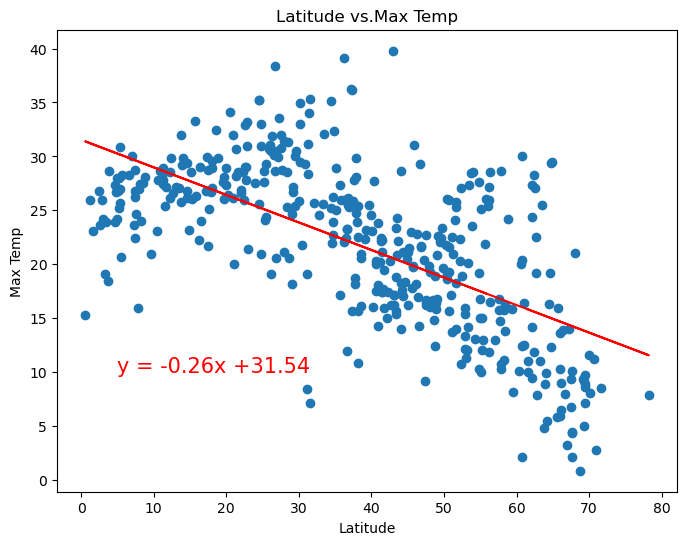

In [209]:
# Linear regression on Northern Hemisphere
plt_line_regression(northern_hemi_df,'Lat','Max Temp',5,10)


The r-value is: 0.6091025490239642


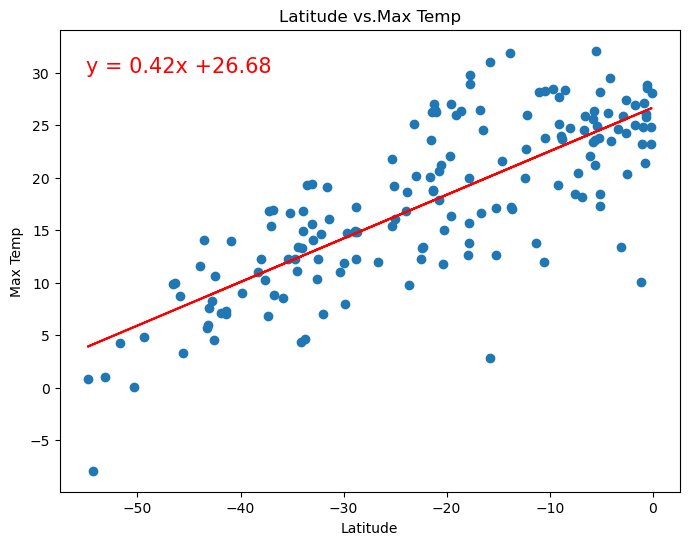

In [210]:
# Linear regression on Southern Hemisphere
plt_line_regression(southern_hemi_df,"Lat","Max Temp",-55,30)

**Discussion about the linear relationship:** 

Liner Regression between Latitude vs. Temperature
Where Latitude is our independent variable (x) and Temperature is the dependent variable (y), we want to find out how Temperature changes when there is a change in the Latitude.

**Northern Hemisphere:**
In the Northern Hemisphere, as you move from the Equator (0°) to higher latitudes (towards the North Pole, 90°N), the temperature generally decreases. Tropical regions (near the Equator) are warmer, while the regions farther from the Equator are cooler.
And we see this in our scatter plot above that the linear regression between latitude and temperature shows a negative relationship because as latitude increases (moving north), temperature decreases.This means that there is a moderate-to-strong tendency for temperatures to decrease as you go from lower latitudes (closer to the Equator) to higher latitudes (closer to the North Pole) in the Northern Hemisphere.

**Southern Hemisphere:**
In the Southern Hemisphere, a similar pattern to the Northern Hemisphere occurs, but in the opposite direction meaning moving from the Equator towards higher southern latitudes (towards the South Pole, 90°S) also results in decreasing temperatures.We see this in our Scatter plot that there is a positive relationship between Latitude and Tempreture in Southern Hemisphere which means as you move further away from the South Pole towards the Equator the tempreture tends to increase.The areas closer to the Equator receive more direct sunlight, while regions closer to the South Pole receive more tilted sunlight, leading to cooler temperatures. 
The R-value (0.7521272229761097) also means that there is a strong tendency for temperatures to increase as you go from higher southern latitudes (closer to the South Pole) to lower southern latitudes (closer to the Equator) in the Southern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002923542868714359


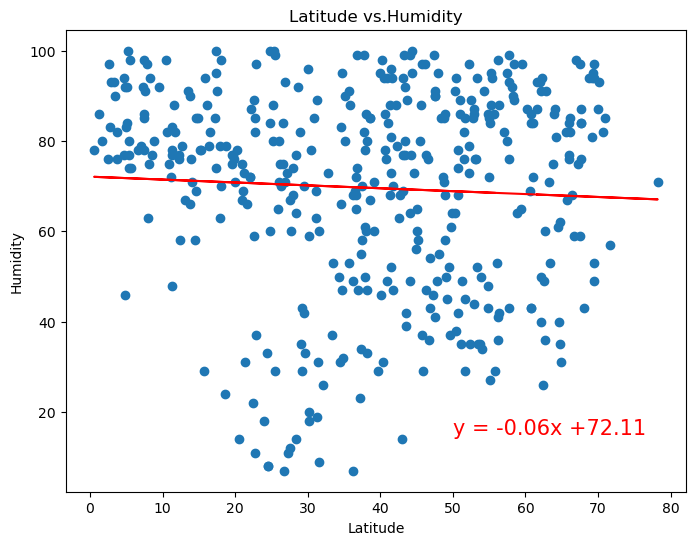

In [211]:
# Northern Hemisphere
plt_line_regression(northern_hemi_df,"Lat","Humidity",50,15)

The r-value is: 0.0038952887829600664


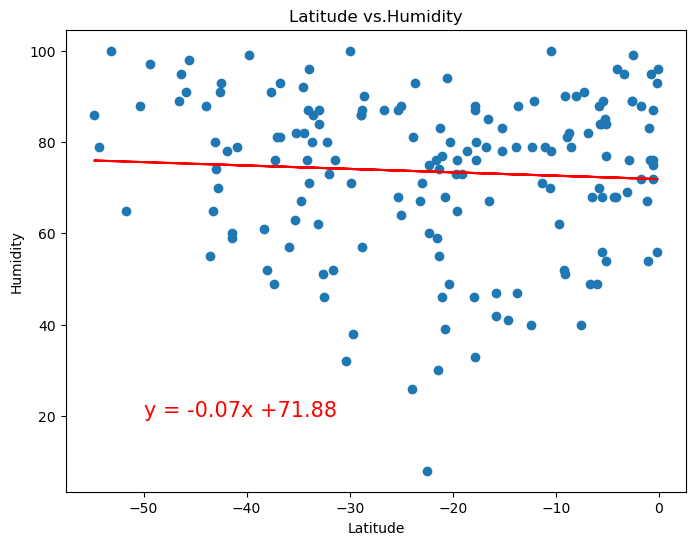

In [212]:
# Southern Hemisphere
plt_line_regression(southern_hemi_df,"Lat","Humidity",-50,20)

**Discussion about the linear relationship Humidity vs. Latitude:** 

**Northern Hemisphere**
Our linear regression for Latitude vs. Humidity shows a very weak relationship between them in Northern Hemisphere, and the r-square value(0.002923542868714359)indicates the same.Which means knowing the latitude of a location gives you very little information about its humidity levels (in our northern hemisphere scatter plot).

**Southern Hemisphere**
Our linear regression shows the same relationship as Northern Hemisphere for Latitude vs. Humidity in Southern Hemisphere, which indicates a very weak linear relationship and suggests that latitude has almost no influence on humidity levels.This could be attributed to variations in climate conditions, geographical features, and/or variance in the atmospheric environment.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0037622185668379385


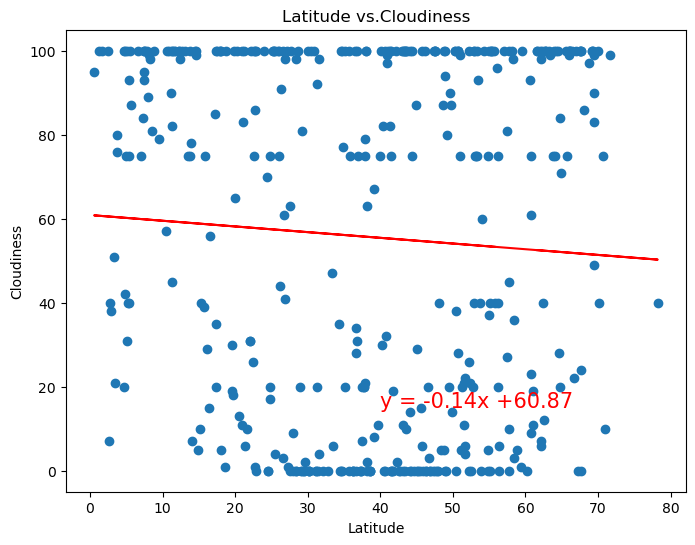

In [213]:
# Northern Hemisphere
plt_line_regression(northern_hemi_df,"Lat","Cloudiness",40,15)

The r-value is: 0.014144962572183947


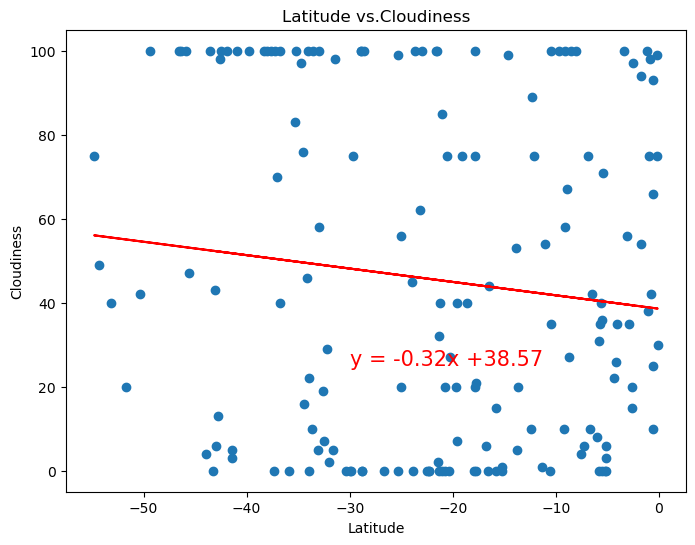

In [214]:
# Southern Hemisphere
plt_line_regression(southern_hemi_df,"Lat","Cloudiness",-30,25)

**Discussion about the linear relationship between Latitude and Cloudiness:** 

**Northern Hemisphere and Southern Hemisphere**
The scatter plots for latitude vs. cloudiness in Northern and Southern Hemisphere indicates exteremly weak to no relationship between both and it is also shown with r-square values of(0.0037622185668379385,0.014144962572183947 ) which suggest that latitude alone does not significantly influence cloudiness.
It shows that cloudiness is influenced by complex weather systems and patterns that are not solely dependent on latitude. For example, high-pressure systems, low-pressure systems, and storm tracks can vary widely within the same latitudinal band. Further analysis would have to be done to determine this.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001072249203759204


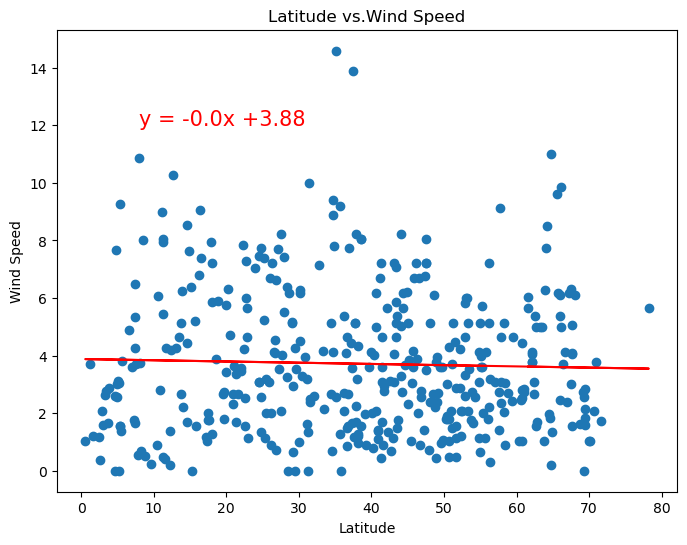

In [215]:
# Northern Hemisphere
plt_line_regression(northern_hemi_df,"Lat","Wind Speed",8,12)

The r-value is: 0.010635642861162878


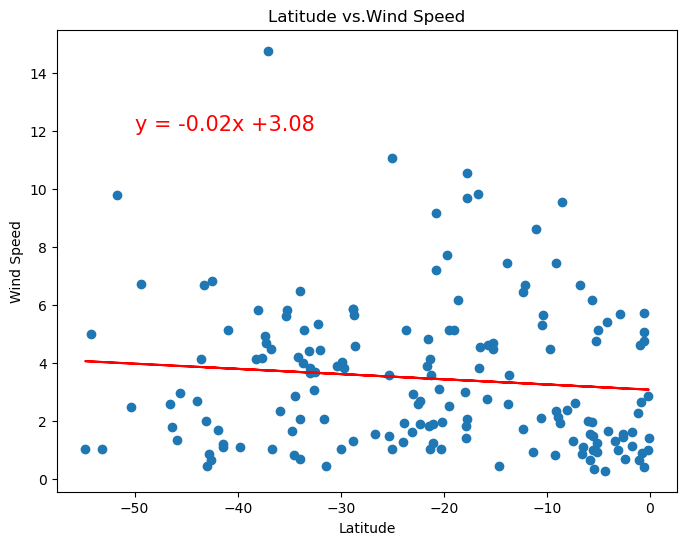

In [216]:
# Southern Hemisphere
plt_line_regression(southern_hemi_df,"Lat","Wind Speed",-50,12)

**Discussion about the linear relationship between Latitude and Wind Speed:** 

**Northern Hemisphere:** Very little, meaning weak to no correlation between wind speed and latitude. 

**Southern Hemisphere:** Very weak negative correlation to no correlation at all between wind speed and latitude. With this, there might be a lack of significant relationship between wind speed and latitude in both hemispheres, as the patterns don't show a clear trend. There might be other factors to consider aside from the latitude alone to find more information regarding what affects wind speeds in these locations. Local topography, oceanic currents, atmospheric pressure systems might be something to consider for future observations.